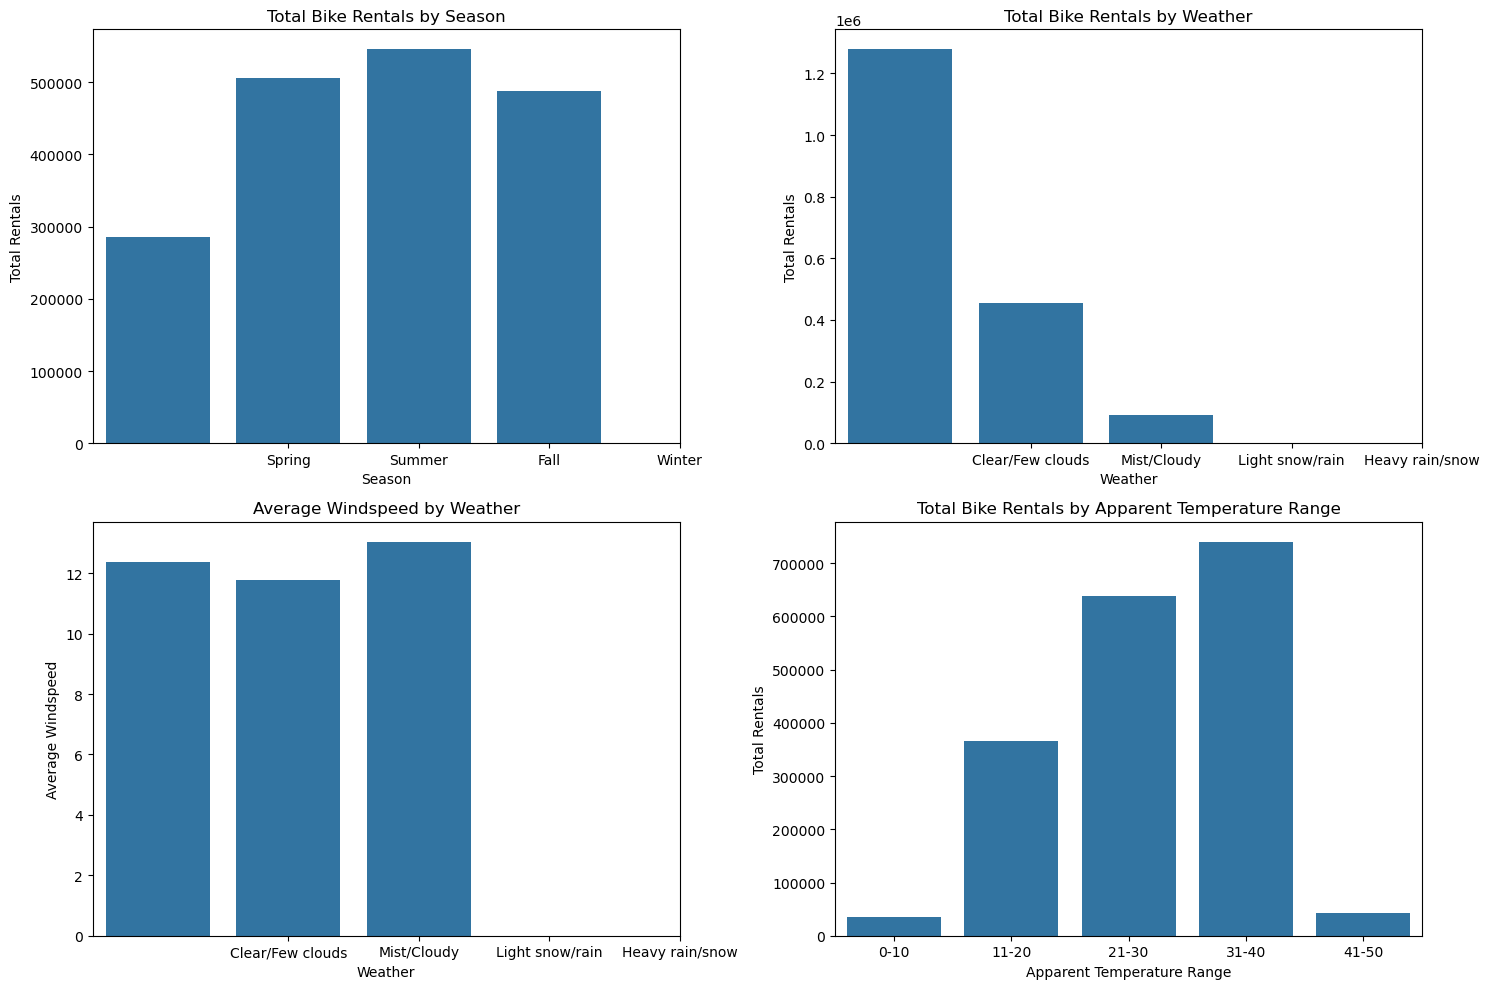

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 데이터 로드
bike_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# datetime 형태로 변경
bike_df['datetime'] = pd.to_datetime(bike_df['datetime'])
test_df['datetime'] = pd.to_datetime(test_df['datetime'])

# 이상치 처리 (IQR 방법을 사용하여 이상치를 제거)
Q1 = bike_df[['season', 'weather', 'atemp', 'windspeed', 'count', 'temp']].quantile(0.25)
Q3 = bike_df[['season', 'weather', 'atemp', 'windspeed', 'count', 'temp']].quantile(0.75)
IQR = Q3 - Q1

bike_df = bike_df[~((bike_df[['season', 'weather', 'atemp', 'windspeed', 'count', 'temp']] < (Q1 - 1.5 * IQR)) |
                                (bike_df[['season', 'weather', 'atemp', 'windspeed', 'count', 'temp']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Feature engineering (datetime에서 필요한 정보 추출)
bike_df['hour'] = bike_df['datetime'].dt.hour
bike_df['month'] = bike_df['datetime'].dt.month
bike_df['weekday'] = bike_df['datetime'].dt.weekday

test_df['hour'] = test_df['datetime'].dt.hour
test_df['month'] = test_df['datetime'].dt.month
test_df['weekday'] = test_df['datetime'].dt.weekday

# 계절별 자전거 총 대여수 계산
seasonal_counts = bike_df.groupby('season')['count'].sum()

# 날씨별 자전거 총 대여수 및 평균 풍속 계산
weather_counts = bike_df.groupby('weather').agg({'count': 'sum', 'windspeed': 'mean'})

# 체감 온도 구간 설정
bins = [0, 10, 20, 30, 40, 50]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50']
bike_df['atemp_bin'] = pd.cut(bike_df['atemp'], bins=bins, labels=labels)

# 체감 온도 구간별 자전거 총 대여수 계산 (observed=True 추가)
atemp_counts = bike_df.groupby('atemp_bin', observed=True)['count'].sum()

# 4개의 그래프를 하나의 그림으로 표시
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 계절별 자전거 총 대여수 그래프
sns.barplot(x=seasonal_counts.index, y=seasonal_counts.values, ax=axes[0, 0])
axes[0, 0].set_title('Total Bike Rentals by Season')
axes[0, 0].set_xlabel('Season')
axes[0, 0].set_ylabel('Total Rentals')
axes[0, 0].set_xticks([1, 2, 3, 4])
axes[0, 0].set_xticklabels(['Spring', 'Summer', 'Fall', 'Winter'])

# 날씨별 자전거 총 대여수 그래프
sns.barplot(x=weather_counts.index, y=weather_counts['count'], ax=axes[0, 1])
axes[0, 1].set_title('Total Bike Rentals by Weather')
axes[0, 1].set_xlabel('Weather')
axes[0, 1].set_ylabel('Total Rentals')
axes[0, 1].set_xticks([1, 2, 3, 4])
axes[0, 1].set_xticklabels(['Clear/Few clouds', 'Mist/Cloudy', 'Light snow/rain', 'Heavy rain/snow'])

# 날씨별 평균 풍속 그래프
sns.barplot(x=weather_counts.index, y=weather_counts['windspeed'], ax=axes[1, 0])
axes[1, 0].set_title('Average Windspeed by Weather')
axes[1, 0].set_xlabel('Weather')
axes[1, 0].set_ylabel('Average Windspeed')
axes[1, 0].set_xticks([1, 2, 3, 4])
axes[1, 0].set_xticklabels(['Clear/Few clouds', 'Mist/Cloudy', 'Light snow/rain', 'Heavy rain/snow'])

# 체감 온도 구간별 자전거 총 대여수 그래프
sns.barplot(x=atemp_counts.index, y=atemp_counts.values, ax=axes[1, 1])
axes[1, 1].set_title('Total Bike Rentals by Apparent Temperature Range')
axes[1, 1].set_xlabel('Apparent Temperature Range')
axes[1, 1].set_ylabel('Total Rentals')

plt.tight_layout()
plt.show()